## 利用统计方法表示数据

In [30]:
corpus = []
# 读入数据集
with open('sixTypes-GeneratedComments.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        corpus.append(line.strip('\n'))

In [31]:
corpus[:10]

['LN7 LN6 CP6 LN10 LN8 CP3 LN8 CP6 LN4 LN3 CN5 CP5 CP4 CP5 CP3 LN12 CP6 LN9 LN7 LN10 LN8 LN3 CP4 LN8 CP4',
 'CP5 LN4 LN2 CP4 CP5 LN11 LN8 CP2 CP4 LN9 CP3 OP3 CP6 LN5 LN4 CP1',
 'LN9 LN12 CP1 CP3 LN1 CP1 LN5 CP5 CP2 CP2 LN9 LN5 CP1 CP5 LN12 CN1 CP3 CN2 CP5 LN2',
 'LN7 CP1 LN12 CP6 LN9 CP2 CP3 CP6 LN2 CP6 CP1 CP5 LN8 CP4 LN2 CP4 LN6 CP1',
 'LN4 ON6 ON3 LN8 LN1 LN7',
 'CP4 ON1 LN2 LN2 LN12 CP6 LN8 LN8 CP1 OP2 CP5 LN3 CN2 CP6 LN10 OP1 CN4 OP5 CP1 CP4 CP2',
 'LN10 CP4 CP1 CP1 OP4 LN3 CP3 LN8 CP4',
 'CP2 LN12 CP2 CP5 CP1 CP1 LN11 CP1 LN5 CP3 LN9 LN12 LN7 LN1 CP1 LN12',
 'LN11 LN9 CP1 LN4 LN1 CP6 LN12 CN2 LN10 CP3 CN5 LN2 CP2 LN8 LN11 CP1 ON6 CP4 OP4 CP3 CP4 CP1',
 'LN9 OP5 LN12 LN10 LN2 LN8 LN10 ON3 LN3 CP6 CP4 LN2 CP4 CP5']

In [32]:
# 预处理
# 去除所有 没有评论的数据
while '' in corpus:
    corpus.remove('')
print('Size of Corpus:', len(corpus))

Size of Corpus: 1200


In [33]:
# 将数据集转换为 List of lists 的形式
corpus_lists = []
for i in corpus:
    corpus_lists.append(i.split(' '))
corpus_lists[:10]

[['LN7',
  'LN6',
  'CP6',
  'LN10',
  'LN8',
  'CP3',
  'LN8',
  'CP6',
  'LN4',
  'LN3',
  'CN5',
  'CP5',
  'CP4',
  'CP5',
  'CP3',
  'LN12',
  'CP6',
  'LN9',
  'LN7',
  'LN10',
  'LN8',
  'LN3',
  'CP4',
  'LN8',
  'CP4'],
 ['CP5',
  'LN4',
  'LN2',
  'CP4',
  'CP5',
  'LN11',
  'LN8',
  'CP2',
  'CP4',
  'LN9',
  'CP3',
  'OP3',
  'CP6',
  'LN5',
  'LN4',
  'CP1'],
 ['LN9',
  'LN12',
  'CP1',
  'CP3',
  'LN1',
  'CP1',
  'LN5',
  'CP5',
  'CP2',
  'CP2',
  'LN9',
  'LN5',
  'CP1',
  'CP5',
  'LN12',
  'CN1',
  'CP3',
  'CN2',
  'CP5',
  'LN2'],
 ['LN7',
  'CP1',
  'LN12',
  'CP6',
  'LN9',
  'CP2',
  'CP3',
  'CP6',
  'LN2',
  'CP6',
  'CP1',
  'CP5',
  'LN8',
  'CP4',
  'LN2',
  'CP4',
  'LN6',
  'CP1'],
 ['LN4', 'ON6', 'ON3', 'LN8', 'LN1', 'LN7'],
 ['CP4',
  'ON1',
  'LN2',
  'LN2',
  'LN12',
  'CP6',
  'LN8',
  'LN8',
  'CP1',
  'OP2',
  'CP5',
  'LN3',
  'CN2',
  'CP6',
  'LN10',
  'OP1',
  'CN4',
  'OP5',
  'CP1',
  'CP4',
  'CP2'],
 ['LN10', 'CP4', 'CP1', 'CP1', 'OP4', 'LN

In [34]:
# 建立 set 以统计已有的 comments 类别
corpus_comments_set = []
for essay in corpus_lists:
    for comment in essay:
        corpus_comments_set.append(comment)
corpus_comments_set = list(set(corpus_comments_set))
corpus_comments_set.sort()
corpus_comments_set

['CN1',
 'CN2',
 'CN3',
 'CN4',
 'CN5',
 'CN6',
 'CP1',
 'CP2',
 'CP3',
 'CP4',
 'CP5',
 'CP6',
 'LN1',
 'LN10',
 'LN11',
 'LN12',
 'LN2',
 'LN3',
 'LN4',
 'LN5',
 'LN6',
 'LN7',
 'LN8',
 'LN9',
 'LP1',
 'LP10',
 'LP11',
 'LP12',
 'LP2',
 'LP3',
 'LP4',
 'LP5',
 'LP6',
 'LP7',
 'LP8',
 'LP9',
 'ON1',
 'ON2',
 'ON3',
 'ON4',
 'ON5',
 'ON6',
 'OP1',
 'OP2',
 'OP3',
 'OP4',
 'OP5',
 'OP6']

In [35]:
len(corpus_comments_set)

48

In [36]:
vectorized_statistical = []
for essay in corpus_lists:
    current_vectorized = [0] * len(corpus_comments_set)
    for comment in essay:
        for index in range(len(corpus_comments_set)):
            if comment == corpus_comments_set[index]:
                current_vectorized[index] += 1
    vectorized_statistical.append(current_vectorized)

In [37]:
print(vectorized_statistical[:10])

[[0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 2, 3, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 3, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 3, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# list 转为 numpy
import numpy as np
np_vectorized_statistical = np.array(vectorized_statistical)

In [46]:
import pickle
# 保存向量化后的数据集
with open('model/vectorized_generated_corpus_statistical.pkl', 'wb') as fw:
    pickle.dump(np_vectorized_statistical, fw)

In [39]:
from sklearn.manifold import TSNE
# 画散点图之前，首先用 TSNE 降维
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(np_vectorized_statistical)

C:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


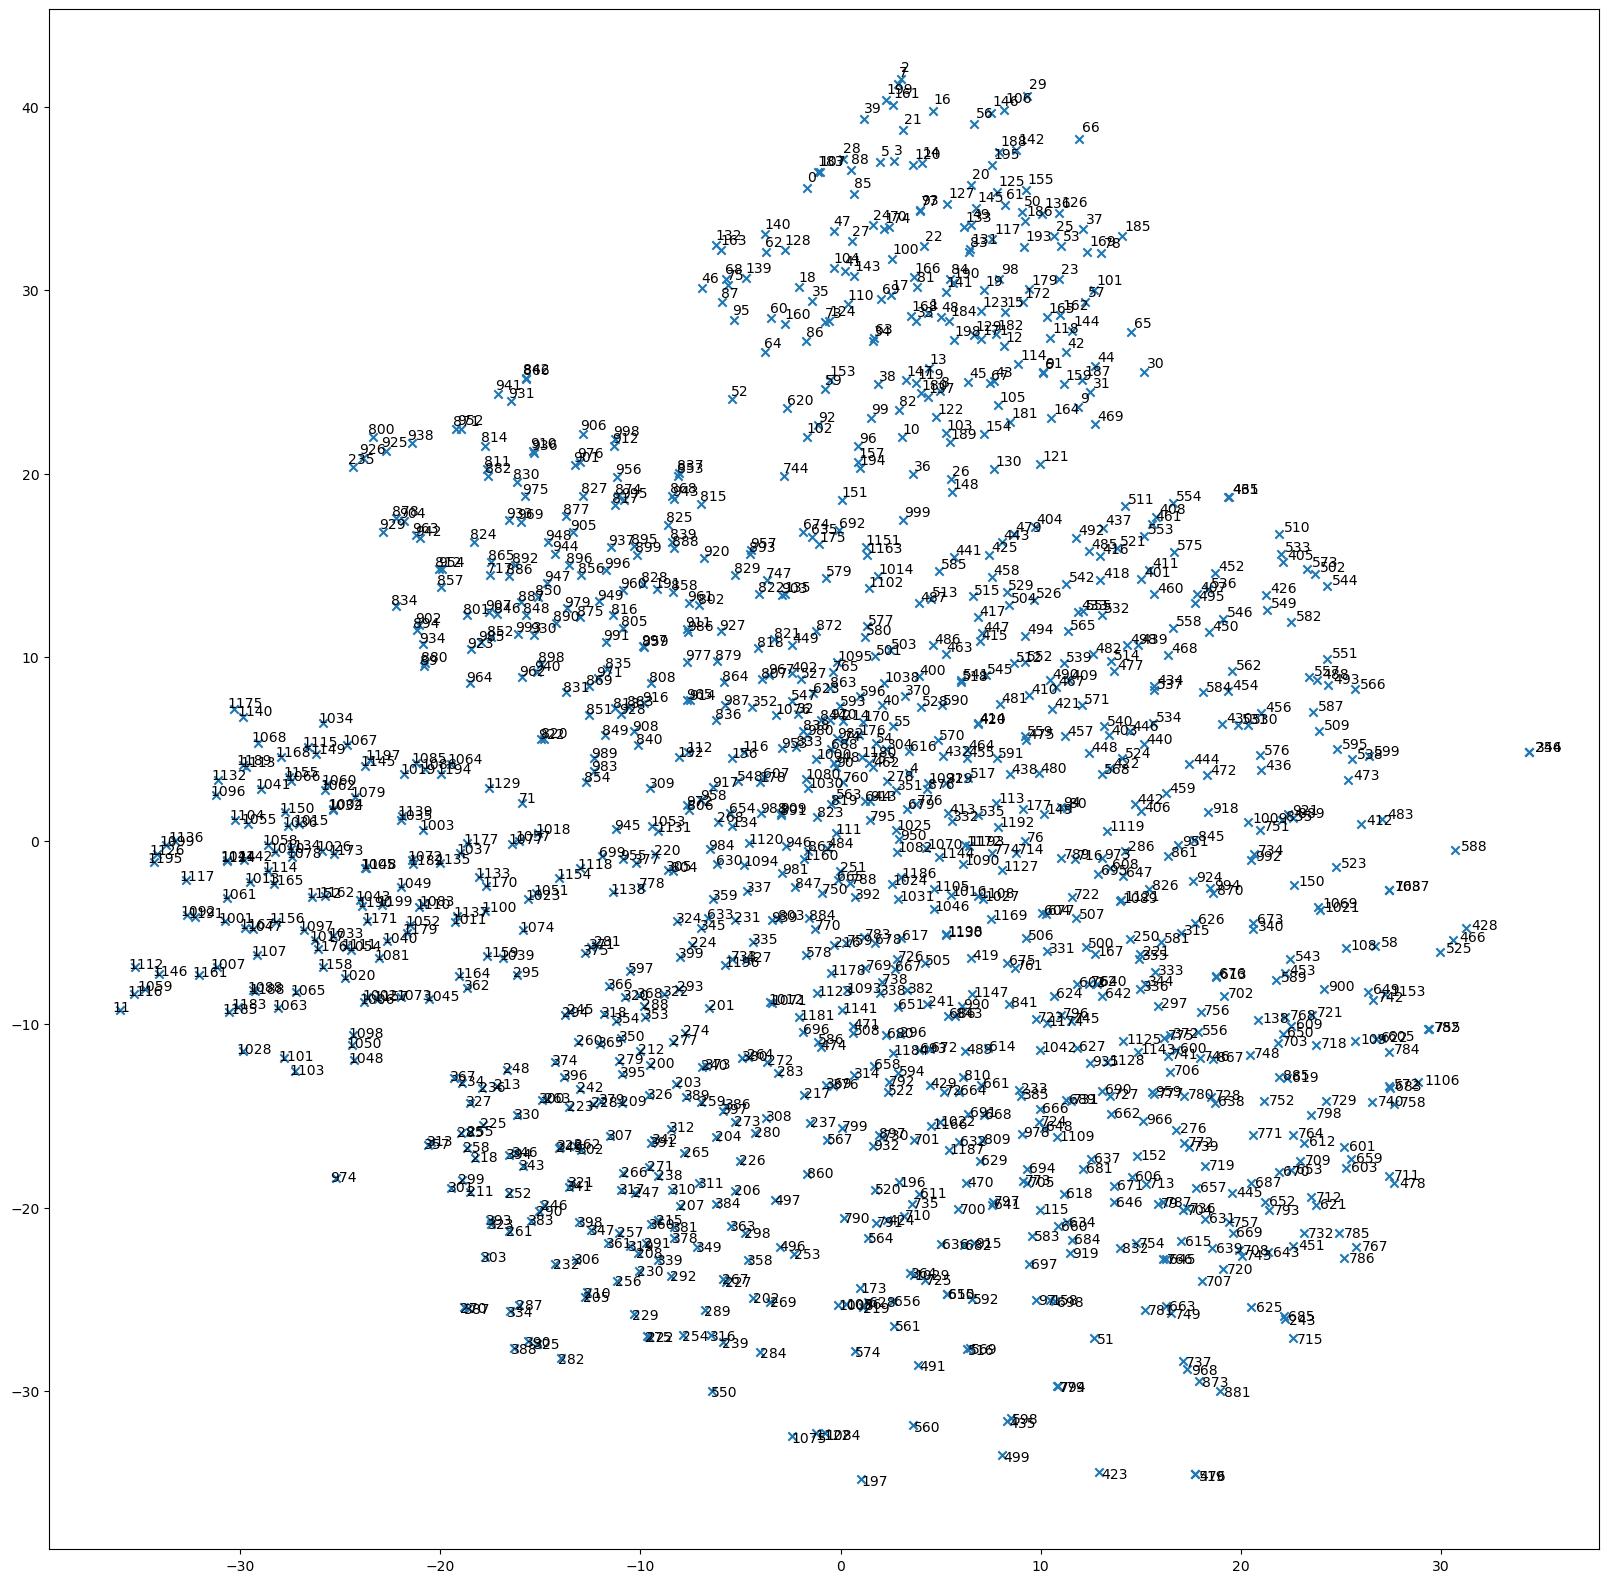

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data[:, 0], decomposition_data[:, 1], marker='x')
for i in range(len(decomposition_data)):
    plt.text(decomposition_data[:, 0][i] * 1.01, decomposition_data[:, 1][i] * 1.01, i, fontsize=10)
plt.show()

In [41]:
print(np_vectorized_statistical[75])

[0 0 0 0 0 0 0 0 2 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0]


In [42]:
# 计算余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
res = cosine_similarity([np_vectorized_statistical[75]], np_vectorized_statistical)[0]
res_index = res.argsort()[-10:].tolist()[::-1]

In [43]:
res_index

[75, 68, 46, 62, 139, 163, 140, 95, 56, 94]

In [44]:
np_vectorized_statistical[res_index]

array([[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0,
        3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 5, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 4, 2, 2, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       